In [1]:
import os, re, requests
import nltk
import git
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from tqdm import tqdm  # For progress bar

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# User & Repo Settings
GITHUB_USER = "ursa-mikail"
LOCAL_DIR = "ursa_repos"
GITHUB_API_URL = f"https://api.github.com/users/{GITHUB_USER}/repos"

HEADERS = {"Accept": "application/vnd.github.v3+json"}

# Keywords for categorization
CATEGORIES = {
    "machine_learning": ["tensorflow", "pytorch", "sklearn", "ml", "deep learning", "neural network"],
    "csv_processing": ["csv", "pandas", "dataframe"],
    "plotting": ["matplotlib", "seaborn", "plot", "graph", "visualization"],
    "web_development": ["flask", "django", "web", "http", "api"],
    "automation": ["script", "automation", "task", "scheduler"]
}

def get_all_repos():
    repos = []
    page = 1
    while True:
        response = requests.get(f"{GITHUB_API_URL}?per_page=100&page={page}", headers=HEADERS)
        if response.status_code != 200:
            print(f"Error fetching repos: {response.status_code}")
            break

        data = response.json()
        if not data:  # No more repositories
            break

        repos.extend(data)
        page += 1  # Next page

    return repos

def clone_repositories():
    repos = get_all_repos()
    print(f"\nCloning {len(repos)} repositories...\n")

    for repo in tqdm(repos):
        repo_name = repo["name"]
        repo_url = repo["clone_url"]
        repo_path = os.path.join(LOCAL_DIR, repo_name)

        if not os.path.exists(repo_path):  # Avoid re-cloning
            os.system(f"git clone {repo_url} {repo_path}")
            print(f"Cloned {repo_name}")
        else:
            print(f"Skipping {repo_name} (already exists)")

# Extract Python keywords from all .py files
def extract_keywords(additional_stopwords_filter_list = None):
    keywords = Counter()
    stop_words = set(stopwords.words("english"))  # Load English stopwords
    stop_words.update(additional_stopwords_filter_list)

    for root, _, files in os.walk(LOCAL_DIR):
        for file in files:
            if file.endswith(".py"):
                file_path = os.path.join(root, file)
                with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                    content = f.read().lower()
                    words = re.findall(r'\b\w+\b', content)  # Extract words
                    words = [word for word in words if word not in stop_words]  # Filter stopwords
                    keywords.update(words)

    return keywords

# Categorize repositories based on keywords found in their files
def categorize_repositories():
    repo_categories = Counter()

    for repo in os.listdir(LOCAL_DIR):
        repo_path = os.path.join(LOCAL_DIR, repo)
        if not os.path.isdir(repo_path):
            continue

        repo_keywords = set()
        for root, _, files in os.walk(repo_path):
            for file in files:
                if file.endswith(".py"):
                    file_path = os.path.join(root, file)
                    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                        content = f.read().lower()
                        repo_keywords.update(re.findall(r'\b\w+\b', content))

        # Assign categories based on keywords
        for category, keywords in CATEGORIES.items():
            if any(keyword in repo_keywords for keyword in keywords):
                repo_categories[category] += 1

    return repo_categories

# Generate keyword frequency plot
def plot_keyword_frequency(keyword_counts):
    plt.figure(figsize=(12, 6))
    number_of_selected_top = 25
    common_words = keyword_counts.most_common(number_of_selected_top)
    words, counts = zip(*common_words)

    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    print(list(words))
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")
    plt.title("Top " + str(number_of_selected_top) + " Keywords in Repositories")
    plt.show()

# Generate repository category plot
def plot_repo_categories(category_counts):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="coolwarm")
    plt.xlabel("Category")
    plt.ylabel("Number of Repositories")
    plt.title("Repositories Categorized by Keyword Themes")
    plt.xticks(rotation=45)
    plt.show()

# Generate WordCloud
def plot_wordcloud(keyword_counts):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(keyword_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Keyword WordCloud")
    plt.show()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Cloning 95 repositories...



  2%|▏         | 2/95 [00:00<00:28,  3.25it/s]

Cloned banking_transaction_and_in_memory_database_system
Cloned basic_openai_api_usage


  3%|▎         | 3/95 [00:01<00:30,  3.04it/s]

Cloned beginning_ML_analytics


  5%|▌         | 5/95 [00:01<00:22,  4.04it/s]

Cloned blockchain_simple_learn_demo
Cloned bolting_and_molting_with_golang_an_anarchist_coding_cook_book


  6%|▋         | 6/95 [00:01<00:19,  4.56it/s]

Cloned bolting_and_molting_with_rust_an_anarchist_coding_cook_book


  7%|▋         | 7/95 [00:01<00:19,  4.55it/s]

Cloned caution-on-canonicalization-of-data-struct-format-under-parsing-vulnerabilities


  8%|▊         | 8/95 [00:02<00:20,  4.17it/s]

Cloned challenge_and_response


  9%|▉         | 9/95 [00:02<00:21,  3.99it/s]

Cloned chrome-ext-moon-phase


 11%|█         | 10/95 [00:02<00:20,  4.20it/s]

Cloned chrome-ext-utilities-timestamp-and-random-hex


 12%|█▏        | 11/95 [00:02<00:21,  3.98it/s]

Cloned ciphers


 13%|█▎        | 12/95 [00:03<00:33,  2.46it/s]

Cloned cipher_js


 14%|█▎        | 13/95 [00:03<00:28,  2.84it/s]

Cloned collab_interface_config_setting_ML_platform


 16%|█▌        | 15/95 [00:04<00:22,  3.57it/s]

Cloned contact_tracing_simulation_on_world_map
Cloned convert_jupyter_notebook_to_python


 18%|█▊        | 17/95 [00:04<00:19,  4.08it/s]

Cloned crime_data_location_heat_map
Cloned cryptographic_function_access_control


 19%|█▉        | 18/95 [00:04<00:18,  4.28it/s]

Cloned CSV-to-HTML-table


 20%|██        | 19/95 [00:05<00:17,  4.35it/s]

Cloned curl-email


 22%|██▏       | 21/95 [00:05<00:20,  3.62it/s]

Cloned CVE_data_analysis
Cloned data_acquisition_and_format


 24%|██▍       | 23/95 [00:06<00:16,  4.25it/s]

Cloned data_form_and_format
Cloned data_list_dict_csv


 26%|██▋       | 25/95 [00:06<00:15,  4.64it/s]

Cloned demo_timing_attack
Cloned emotions_clusters


 27%|██▋       | 26/95 [00:06<00:16,  4.11it/s]

Cloned emotion_tree_visualization


 28%|██▊       | 27/95 [00:07<00:16,  4.10it/s]

Cloned file_activity_monitor_with_sha_256_hash_calculation


 29%|██▉       | 28/95 [00:07<00:19,  3.36it/s]

Cloned file_embedded_with_file_with_LSB_encoding


 31%|███       | 29/95 [00:07<00:18,  3.52it/s]

Cloned file_format_identifying


 32%|███▏      | 30/95 [00:08<00:17,  3.67it/s]

Cloned flask-for-server_curl_simple


 33%|███▎      | 31/95 [00:08<00:16,  3.79it/s]

Cloned folder_file_profiling


 34%|███▎      | 32/95 [00:08<00:23,  2.72it/s]

Cloned git_all_repo_static


 35%|███▍      | 33/95 [00:09<00:20,  3.05it/s]

Cloned git_as_reminder_service


 36%|███▌      | 34/95 [00:09<00:17,  3.43it/s]

Cloned golang-gaia-basic-structure


 37%|███▋      | 35/95 [00:09<00:16,  3.68it/s]

Cloned Golang-Introspect-Utility


 38%|███▊      | 36/95 [00:09<00:15,  3.87it/s]

Cloned go_sample_scaffold_working_structure


 39%|███▉      | 37/95 [00:10<00:15,  3.73it/s]

Cloned heart_disease_prediction_model


 40%|████      | 38/95 [00:10<00:15,  3.70it/s]

Cloned iframed_multiple_readmes


 41%|████      | 39/95 [00:10<00:14,  3.81it/s]

Cloned image_blur_effect


 43%|████▎     | 41/95 [00:11<00:12,  4.32it/s]

Cloned image_registry
Cloned install_jupyter


 44%|████▍     | 42/95 [00:11<00:11,  4.53it/s]

Cloned JSON_Filesystem_Emulator


 45%|████▌     | 43/95 [00:11<00:15,  3.31it/s]

Cloned jwt_rsa_ecc


 46%|████▋     | 44/95 [00:12<00:17,  2.99it/s]

Cloned Kharon


 47%|████▋     | 45/95 [00:12<00:16,  3.06it/s]

Cloned location_display


 49%|████▉     | 47/95 [00:12<00:12,  3.69it/s]

Cloned memory_allocation_with_magic_numbers
Cloned mikail-eliyah.github.io


 51%|█████     | 48/95 [00:13<00:11,  4.05it/s]

Cloned mount_google_drive_to_colab


 52%|█████▏    | 49/95 [00:13<00:11,  4.15it/s]

Cloned name-replacement-lookup


 53%|█████▎    | 50/95 [00:13<00:10,  4.20it/s]

Cloned paillier_homomorphic_encryption_with_ui


 54%|█████▎    | 51/95 [00:13<00:10,  4.25it/s]

Cloned plot_3d_intro


 55%|█████▍    | 52/95 [00:14<00:10,  4.21it/s]

Cloned polynomial_modulo_plotting


 57%|█████▋    | 54/95 [00:14<00:08,  4.57it/s]

Cloned probability_decision_tree
Cloned profile_secure_sharing


 58%|█████▊    | 55/95 [00:14<00:09,  4.33it/s]

Cloned python-gaia


 59%|█████▉    | 56/95 [00:14<00:08,  4.41it/s]

Cloned Python-Introspect-Utility


 60%|██████    | 57/95 [00:15<00:13,  2.73it/s]

Cloned python_activity_monitoring


 62%|██████▏   | 59/95 [00:16<00:10,  3.46it/s]

Cloned python_function_call_graph_generator
Cloned python_plot_intro


 63%|██████▎   | 60/95 [00:16<00:09,  3.81it/s]

Cloned qr_code_json_encoder_decoder_for_contact_share


 64%|██████▍   | 61/95 [00:16<00:08,  4.06it/s]

Cloned randomized_device_connections_with_directions


 65%|██████▌   | 62/95 [00:16<00:07,  4.20it/s]

Cloned random_noise_stacking_cancellation


 66%|██████▋   | 63/95 [00:16<00:07,  4.38it/s]

Cloned reference_codes


 68%|██████▊   | 65/95 [00:17<00:06,  4.83it/s]

Cloned scenario_context_coverage_in_demo_presentations
Cloned scrambler


 69%|██████▉   | 66/95 [00:17<00:06,  4.66it/s]

Cloned sessional_secrecy


 72%|███████▏  | 68/95 [00:17<00:05,  5.18it/s]

Cloned set_up_kaggle_access_given_ciphered_token_and_get_dataset
Cloned shamir_share_demo


 74%|███████▎  | 70/95 [00:18<00:04,  5.44it/s]

Cloned shell_make_multiple_certs
Cloned shell_menu_file_management


 76%|███████▌  | 72/95 [00:18<00:04,  5.16it/s]

Cloned shell_menu_rsa_sign
Cloned shell_script_utility


 77%|███████▋  | 73/95 [00:18<00:04,  5.33it/s]

Cloned shell_secret_keep


 79%|███████▉  | 75/95 [00:19<00:04,  4.31it/s]

Cloned site_announcement
Cloned sql_csv_porting


 81%|████████  | 77/95 [00:19<00:03,  4.89it/s]

Cloned sql_csv_yaml_json_porting
Cloned stable_diffusion_basics


 83%|████████▎ | 79/95 [00:20<00:03,  5.26it/s]

Cloned tabulated_data_markup_language_tdml_file_into_a_csv
Cloned templates


 85%|████████▌ | 81/95 [00:20<00:02,  5.39it/s]

Cloned Test_Framework_For_Reversible_Action
Cloned test_ground_observatory_zone_00


 86%|████████▋ | 82/95 [00:20<00:03,  3.70it/s]

Cloned text_diff_utilities


 87%|████████▋ | 83/95 [00:21<00:03,  3.83it/s]

Cloned threat_modeling_framework_and_sop


 88%|████████▊ | 84/95 [00:21<00:02,  3.86it/s]

Cloned Time_Complexity_Visualization


 89%|████████▉ | 85/95 [00:21<00:02,  4.10it/s]

Cloned time_formats


 91%|█████████ | 86/95 [00:21<00:02,  4.14it/s]

Cloned tokenized_data_encryption_and_decryption


 93%|█████████▎| 88/95 [00:23<00:02,  2.53it/s]

Cloned toolings
Cloned tree_pruning_text


 94%|█████████▎| 89/95 [00:23<00:01,  3.02it/s]

Cloned uml


 96%|█████████▌| 91/95 [00:23<00:01,  3.31it/s]

Cloned ursa-mikail
Cloned user_profile_venn_diagrams


 97%|█████████▋| 92/95 [00:24<00:00,  3.82it/s]

Cloned visualizing_kalman_filter_for_noise_reduction


 98%|█████████▊| 93/95 [00:24<00:00,  3.05it/s]

Cloned word_cloud_maker


100%|██████████| 95/95 [00:25<00:00,  3.79it/s]

Cloned x509_js
Cloned yaml_tree_visualization



<ipython-input-1-3d8452d947e0>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


['cipher', 'cryptography', 'signature', 'crypto', 'cert', 'password', 'profile', 'certificate', 'frequencies', 'address', 'introspect', 'inventory', 'template', 'subprocess', 'data_formatter', 'encoding', 'probability', 'introspection', 'secrets', 'openssl', 'elapsed_time', 'text_processor', 'parameters', 'parameter', 'emotion']


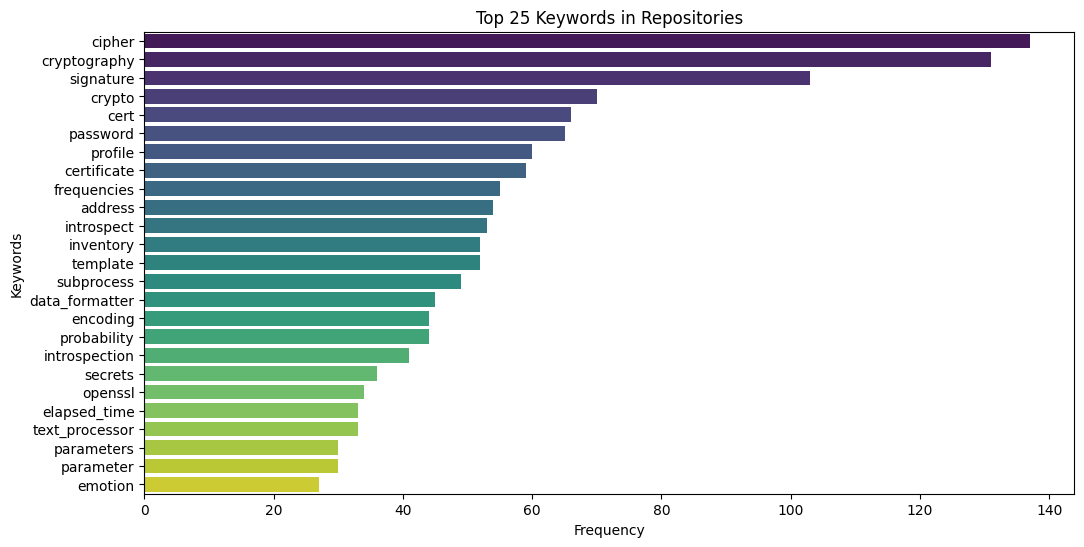

<ipython-input-1-3d8452d947e0>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="coolwarm")


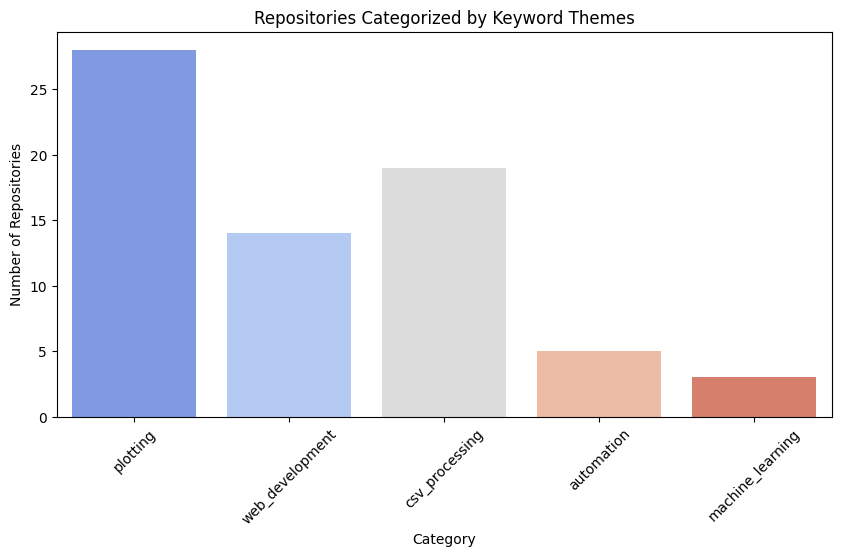

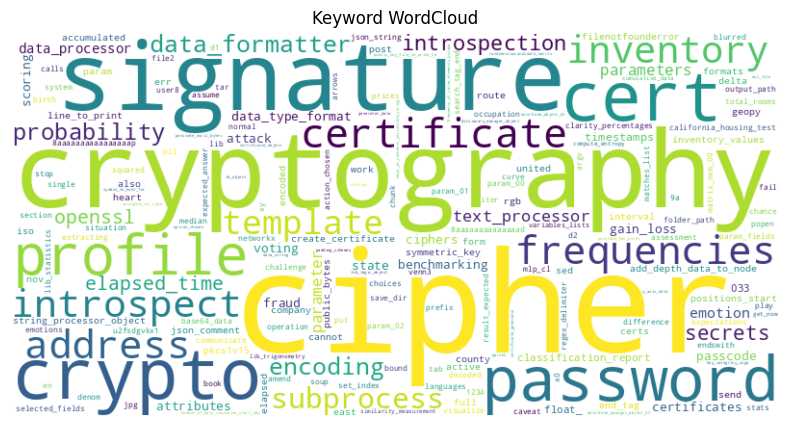

In [2]:

# Main execution
if __name__ == "__main__":
    clone_repositories()
    N = 1000  #
    numbers = [str(i) for i in range(0, N + 1)]
    numbers.extend(['1739378790', '65537', '2048', '2359', ])
    # Append numbers from '00' to '099'
    numbers.extend([f"{i:02d}" for i in range(0, 100)])
    numbers.extend([str(i) for i in range(2014, 2026)])

    alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    keywords_python = ['tensorflow', 'pytorch', 'sklearn', 'ml', 'deep learning', 'neural network', 'pandas', 'dataframe', 'matplotlib', 'seaborn', 'plot', 'graph', 'visualization', 'df',
                       'random', 'pd', 'text', 'def', 'function', 'plt', 'import', 'print', 'data', 'return', 'message', 'test', 'key', 'file', 'len', 'model', 'time', 'bytes', 'pandas', 'np',
                       'true', 'false', 'os', 'tf']
    keywords_others = ['accuracy', 'feature', 'domain', 'predict_domain', 'columns', 'values', 'features', 'pipe', 'shape', 'bits', 'nonce', 'value', 'timestamp', 'tree', 'string', 'secret_key', 'dataset', 'using', 'create',
                       'target', 'x_test', 'token', 'open', 'base64', 'y_test', 'else', 'secret', 'title', 'grid', 'params', 'results', 'id', 'classification', 'logisticregression', 'generate', 'number', 'hex',
                       'csv', 'fit', 'bit_stream', 'range', 'numpy', 'load', 'n_samples', 'hmac', 'onehotencoder', 'score', 'raw', 'githubusercontent', 'sha256', 'append', 'guessed', 'show', 'get', 'hashlib', 'color',
                       'classifier', 'sex', 'display', 'length', 'keys', 'xlabel', 'ylabel', 'preprocessing', 'cross_val_score', 'row', 'date', 'hash', 'label', 'far', 'predict', 'dictionary', 'byte', 'image', 'path',
                       'mean', 'read_csv', 'simpleimputer', 'cross', 'distribution', 'int', 'sample_data', 'example', 'none', 'padding', 'add', 'figure', 'survived', 'x_train', 'y_train', 'random_state', 'make_pipeline', 'master', 'ascii',
                       'tweak', 'set', 'guess', 'apply', 'png', 'txt', 'json', 'tag', 'clf', 'regression', 'py', 'write', 'usage', 'original', 'aes', 'file_path', 'figsize', 'justmarkham', 'videos', 'strings', 'request', 'new_data',
                       'impute', 'url', 'use', 'count', 'ct', 'ohe', 'predicted', 'domains', 'kismet', 'sentiment', 'output', 'response', 'main', 'size', 'countvectorizer', 'cols', 'psyche', 'content', 'encode', 'list',
                       'items', 'make_column_transformer', 'model_selection', 'age', 'coefficients', 'pneuma', 'cumulative', 'predictions', 'metrics', 'history', 'folium', 'utf', '256', 'try', 'html', 'search', 'step', 'fit_transform',
                       'gridsearchcv', 'evaluate', 'prediction', 'soma', 'str', 'result', 'one', 'guessed_password', 'pyplot', 'seed', 'transaction', 'data_url_train', 'fare', 'linear_model', 'randomforestclassifier', 'pclass', 'marker', 'loss',
                       'n_bits', 'sourceidentifier', 'save', 'choice', 'sha', 'decode', 'new', 'x00', 'line', 'index', 'select', 'train_test_split', 'validation', 'predicting', 'df_new', 'lists', 'map', 'opus', 'subplot',
                       'code', 'install', 'join', 'args', 'language', 'first', 'pem', 'plaintext', 'update', '__name__', 'party', 'class', 'scaler', 'intercept', 'models', 'pdf', 'location', 'bound_lower', 'subject', 'issuer',
                       'lat', 'lon', 'requests', 'binascii', 'bytes_to_hex', 'hexdigest', 'ursa', 'split', 'encrypted', 'define', 'correct', 'selection', 'best', 'dtype', 'ensemble', 'standardscaler',
                       'strategy', 'report', 'vs', 'best_model', 'link', 'item_id', 'previous_hash', 'parent', 'pip', 'read', 'dir_start', 'back', 'img', 'prepare', 'lang', 'round', 'private_key', 'public_key', 'directory_out', '__main__',
                       'object', 'based', 'user', 'titanic_train', 'vect', 'missing', 'matrix', 'avg', 'learning', 'feature_columns', 'tokenizer', 'bit_index', 'year', 'published', 'description', 'reader', 'balance', 'amount', 'hashes',
                       'world', 'returns', 'except', 'order', 'hazmat', 'ciphertext', 'filename', 'base', 'actual', 'legend', 'compose', 'unique', 'cv', 'scatter', 'alpha', 'train', 'prediction_results', 'generated', 'saved', 'detected',
                       'axis', 'cell', 'urandom', 'hello', 'error', 'rf', 'context', 'serialization', 'decrypted', 'encrypted_data', 'decrypted_data', 'key_bytes', 'check_password', 'test_size', 'logistic', 'preprocessor',
                       'drop', 'parch', 'auc', 'col', 'embarked', 'datasets', 'array', 'header', 'interaction', 'experiment', 'tweets', 'nltk', 'item', 'graphic', 'xml', 'lastmodified', 'parent_stack', 'expected_token', 'names',
                       'hexadecimal', '4f', 'extraction', 'html_content', 'variable', 'generate_hmac', 'primitives', 'files', 'block_size', 'block', 'lambda', 'run', 'columntransformer', 'without', 'initialize', 'sibsp', 'default',
                       'binary', 'sns', 'constant', 'confusion', 'precision', 'recall', 'training', 'node', 'lab',  'addresses', 'bob', 'alice', 'notebook', 'download', 'hex_str', 'encrypt', 'make', 'rsa', 'time_00', 'string_length', 'prime', 'process',
                       'algorithms', 'iv', 'aad', 'secret123', 'user_secret_key', 'titanic_test', 'include', 'feature_extraction', 'problem', 'cabin', 'x_cols', 'name_length', 'transformed', 'rand', 'ones', 'access', 'ordinalencoder', 'red', 'level', 'predicted_cum',
                       'tight_layout', 'train_dataset', 'test_dataset', 'tokens', 'file_to_be_embedded', 'data_in_dec_with_inserted_bits', 'data_in_dec_masked', 'width', 'bob_trail', 'alice_trail', 'add_to', 'role', 'ip_address', 'directory', 'th',
                       'elif', 'strip', 'found', 'delay', 'necessary', 'best_time', 'best_char', 'char', 'simulate', 'max', 'analysis', 'user_id', 'transformer', 'nan', 'categorical', 'imputer', 'solver', 'nameattribute', 'lower', 'enumerate', 'option',
                       'liblinear', 'tuning', 'l2', 'make_column_selector', 'x_new', 'reshape', 'coef_', 'passthrough', 'square', 'cost', 'batch_size', '_cum', 'bert', 'batch', 'tokenize', 'compound', 'inputs', 'icon',
                       'nameid', 'distance', 'openai', 'location_1', 'location_2', 'extract', 'output_file', 'wb', 'makedirs', 'recovered', 'hexlify', 'generate_random_hex', 'characters', 'added', 'private', 'public', 'hex_output', 'signed',
                       'zip', 'encryptor', 'finalize', 'decryptor', 'padder', 'unpadder', 'initial', 'sleep', 'adding', 'done', 'character', 'perform', 'start_time', 'compare_digest', 'cvv', 'data_url_test', 'selectpercentile', 'set_config', 'l1',
                       'total', 'votingclassifier', 'lr', 'multiclass', 'randomly', 'ticket', 'confusion_matrix', 'tolist', 'y_col', 'imp_constant', 'problem_type', 'roc', 'positive', 'variables', 'store', 'loaded', 'ax', 'term',
                       'weight', 'from_pretrained', 'test_labels', 'test_preds', 'file_with_embedded', 'root', 'position', 'corrupted', 'break', 'hidden', 'email_dir', 'jsonify', 'n_day_stage', 'json_manager', 'y_axis_data_sets',
                       'chain', 'nx', 'csv_data', 'child', 'color_map', 'urlsafe_b64encode', 'function_1', 'given', 'valueerror', 'document', 'multiple', 'prob', 'randint', 'number_of_bytes', 'context_hex', 'num_bytes', 'must', 'rounds',
                       'wa', 'ad', '8ap', 'aaap', '8aaa', 'waad', 'waaaap', 'aaaaa', '8aaaad', 'start', 'agent', 'sys', 'lib_path', '8d', 'wp', 'operation_chosen', 'datetime', 'end', '_gaia', 'day', 'insert', 'histogram', 'times', 'rotation', 'bound_upper',
                       'america', 'aaaaaad', 'waaaaaa', '8aaaaaap', 'type', 'float', 'format', 'math', 'month', 'libraries', 'abspath', 'default_backend', 'dataframe_object', 'who_am_i', 'days', 'gaia', 'cursor', 'contents', '8aaaaaaaa', 'point',
                       'waaaaaaad', '_', 'data_formatter_object', 'asia', 'timer_object', 'backend', 'aaaaaaaap', 'next_day', 'connection', 'string_target', 'internal', 'version', 'library', 'replace', 'match', 'seconds', 'remove', 'x509',
                       'counter', 'help', 'min', 'pattern', 'status', 'table', 'scores', 'fields', '__init__', 'input', 'find', 'latitude', 'number_of_days', 'coordinates_00', 'package', 'data_generator_object', 'close', 'dot', 'x_data', 'conn',
                       'exists', 'start_date', 'removed', 'europe', 'verify', 'rows', 'filesystem', 'spec', 'permit', 'exception', 'log', 'bin', 'display_plot_object', 'operation_unary_options', 'file_to_read_from', 'timer', '__del__', 'target_string', 'stat',
                       'africa', 'left', 'gcm', 'fig', 'encryption', 'hour', 'sum', 'shares', 'yes', 'end_time', 'pos', 'event', 'modes', 'number_of_bytes_to_pad', 'check', 'field', 'output_to_display', 'data_generator', 'title_main', 'secrets_data', 'dict',
                       'raise', 'pass', 'meta', 'born', 'display_console_object', 'row_index', 'coordinates_01', 'degrees', 'command', 'current_dir', 'block_length', 'pacific', 'part',  'statement', 'execute', 'timedelta', 'st', 'functions', 'etc', '_gaia_object',
                       'compute', 'failed', 'empty', 'arange', 'linewidth', 'file_name', 'yaml', 'theta', 'end_date', 'polynomial', 'dataframe_manager_object', 'memory', 'decision', 'iterations', 'longitude', 'lines', 'linestyle', 'python', 'ind', 'non', 'display_console',
                       'data_points', 'json_manager_object', 'depth', 'black', 'frequency', 'dumps', 'current', 'colors', 'resultant', 'description_x_label', 'column_name', 'row_data', 'contents_serialized_json', 'minutes', 'sample', 'exist', 'digest', 'y_data', 'file_target',
                       'pyautogui', 'martix_resultant', 'column_index', 'coordinates', 'last', 'sign', 'distances', 'pkey', 'table_name', 'db', 'nameoid', 'aes_key', 'hmac_key_before', 'hmac_key_after', 'waaaaaaaaaaa', 'locations', 'dimensions', 'grid_option', 'description_y_label',
                       'sql_statement', 'decrypt', 'options', 'ca', 'indent', 'sec', 'compile', 'collection', 'kaggle', 'lstrip', 'time_delta', 'second', 'dd', 'csvfile', 'headers', 'group', 'enter', 'aaaaaaaaaaad', 'regex', 'assert', 'line_storage', 'number_of_data_points',
                       'upperbound', 'lowerbound', 'layer_number_index', 'dataframe_manager', 'filtered_tokens_unique', 'mode', 'calculate', 'us', 'selected', 'aa', 'ee', 'test_data', '8aaaaaaaaaaap', 'row_size', '1st', 'log_line',
                       'gmt', 'points', 'mu', 'users', 'offset', 'rstrip', 'coef', 'waaaaaaaaap', 'folder1', 'user_input', 'next_position', 'data_conversion_on_array', 'column_size', 'mysql_lib_object', 'labels', 'right', 'pi', 'ensure', 'case', 'current_time',
                       '8aaaaaaaaad', 'inventory_id', 'array_target', 'row_counter', 'query', 'closest', 'edge', 'aaaaaaaaaa', 'commits', 'routes', 'simple_route', 'lib_statistics_object', 'x_axis_data_sets', 'inventory_key', 'layer_count', 'decryption', 'www', 'fake', 'info', 'ec',
                       'hmac_before_value', 'hex_string', 'starting', 'qr', 'intersection', 'f_0', 'f_1', 'f_2', 'f_3', 'ts', 'id_data_generator', 'display_plot', 'matched_substrings', 'minute', 'drive', 'images', 'updated', 'next', 'hmac_before', 'hmac_after', 'shared', 'copy', 'file3',
                       'operation_python_data_string_to_and_from_byte_object_options', 'display_variable', 'number_of_rows', 'array_or_matrix', 'gaia_class_name', 'decimal', 'database', 'word', 'call', 'long', 'expectation', 'span', 'operation_options', 'delimiter', 'data_padded',
                       'data_hex_bytes_string_padded', 'status_found', 'str_target', 'direction', 'see', 'org', 'blue', 'hours', 'dates', 'isinstance', 'exit', 'created', 'microseconds', 'getting', 'findall', 'sigma', 'file_manager_object', 'text_processor_object', 'plateau',
                       'contents_formatted', 'tasks', 'res', 'used', 'zone_letter', 'e_squared', 'sql', 'writer', 'details', 'years', 'backends', 'words', 'yellow', 'bb', '__', 'fp', 'dir', 'line_target', 'data_type', 'date_start', 'start_from_day_n', 'string_filtered',
                       'button', 'valid', 'scale', 'series', 'time_start', 'dt', 'oaep', 'loop', 'email', 'passed', 'iloc', 'df_grouped', 'cpu_usage', 'mem_usage', 'file_manager', 'data_manipulator', 'id_display_plot', 'symbols', 'file_location', 'row_indices_that_satisfy_conditions', 'path_to_file',
                       'domain_title', 'australia', 'graph_index', 'byte_array_object', 'data_int_array', 'connect', 'green', 'draw', 'time_end', 'exist_ok', 'symmetric', 'algorithm', 'sorted', 'running', 'stdout', 'path_parts', 'cloning', 'pool', 'element', 'id_timer',
                       'function_list', 'file_to_write_to', 'pause_time_delta_list', 'time_01', 'number_of_events', 'duration_in_hours', 'value_to_pad', 'upper', 'integer', 'commit', 'written', 'json_file', 'share', 'within', 'repo', 'pss',
                       'outcome', 'annotations', 'unit', 'get_data_range', 'divmod', 'annotation_control', 'data_hex_bytes_string', 'zero', 'cos', 'dms', 'tuple', 'california', 'null', 'different', 'another', 'recipient', 'successful', 'filepath', 'factorial',
                       'folder', 'shell', 'graphviz', 'white', 'standard', 'utility', 'ref', 'output_array', 'id_data_formatter', 'filetype_pem', 'content_extracted', 'column_names_with_values_as_conditions', 'fruit', 'localtime_struct', 'csv_table', 'want', 'radians', 'sqrt', 'port',
                       'record', 'cve', 'plotting', 'd_', 'rb', 'invalid', 'clear', 'filter', 'matches', 'timing', 'took', 'cbc', 'rate', 'fontsize', 'file_type', 'percentages',  'salt', 'column_01', 'column_02', 'tp', 'argument', 'module', 'line_color', 'aes_cipher', 'aes_cipher_object',
                       'path_to_certificates', 'number_of_columns', 'column_headers', 'csv_manager_object', 'score_average_of_the_day', 'go', 'trace', 'intensity_histogram', 'loc', 'time_elapsed', 'faker', 'username', 'strptime', 'json_data', 'loads', 'serial_number', 'utcnow', 'cn', 'already', 'user1',
                       'processing', 'numbers', 'verification', 'custom', 'orange', 'fibonacci', 'p_value', 'origin_pools', 'primes', 'lower_bound', 'upper_bound', 'tn', 'id_display_console', 'similarity_measurement_object', 'evidence', 'day_of_week_enum', 'day_of_week', 'generate_random_integers', 'codecs',
                       'brace_start', 'regex_lib_object', 'time_present', 'array_resultant', 'style', 'canada', 'duration', 'server', 'asymmetric', 'generate_private_key', 'paths', 'mgf', 'mgf1', 'ecdsa', 'app', 'available', 'fetch', 'idx', 'data_list', 'github', 'sha384', 'data_target', 'equal',
                       'enc', 'poly', 'city', 'int_array', 'item_name', 'repos', 'namespace', 'shamir', 'number_of_tabs', 'id_file_manager', 'number_of_keys', 'data_manipulator_object', 'file_in_byte_array', 'number_of_days_left', 'continous', 'string_buffer', 'node_manager', 'cmap', 'widgets', 'click',
                       'dump', 'hmac_after_value', 'service', 'digits', 'arguments', 'diagram', 'every', 'linestyles', 'pause', 'titles', 'answer', 'clarity_percentage', '___', 'secs', 'trial', 'object_ids', 'number_of_points', 'today', 'file_json_chosen', 'binary_resultant', 'data_conversion_hex_and_bytes_object',
                       'trend_profiler', 'certificate_generator_object', 'trend_profiler_object', 'values_in_contents_serialized_string', 'test_usages', 'row_headers', 'keywords_grep_object', 'filtered_tokens', 'stringtarget', 'numerator', 'week_number', 'day_counter_of_the_week', 'milestone_in_hours', 'next_event_time_min',
                       'next_event_time_hour', 'days_remainder', 'does_not_exist', 'string_formatted', 'linspace', 'abs', 'sin', 'google', 'method', 'sqlite3', 'fetchall', 'newline', 'intensity_max_high', 'intensity_max_low', 'months', 'm_', 'key_size', 'cert_path', 'successfully', 'user3', 'status_code', 'adversary', 'parser',
                       'listdir', 'obj', 'chr', 'stderr', 'expected', 'extracted', 'reset', 'weights', 'circle', 'metadata', 'keras', 'page', 'press', 'chart', 'fn', 'timer_0', 'plot_marker_style', 'yet', 'days_of_week', 'start_from_week_n', 'json_file_data', 'grid_options', 'value_int_00', 'lengthofdigits',
                       'random_bytes_string', 'padding_schemes_object', 'proclivity_features_of_graph', 'unique_symbols', 'trial_key', 'string_row_0', 'number_of_tasks', 'denominator', 'data_index', 'gaia_template_manager_object', 'warning', 'dec', 'view', 'ontario', 'xticks', 'country', 'strftime', 'maximum', 'accepted',
                       'skip', 'week', 'local', 'pre', 'fromhex', 'echo', 'client', 'decisions', 'action', 'may', 'original_hex', 'categories', 'bins', '8aaaaaaaaaaaaa', 'video', 'api', 'win', 'date_end', '23_2010hr_04sec', 'plot_marker_styles', 'lib_library_manager', 'hex_string_array', 'byte_object_00', 'associated_data',
                       'organization', 'data_symbols', 'brace_end', 'value_elements_unique', 'rainy', 'zip_file_name', 'collection_name', 'db_names', 'pause_time_end', 'pause_on', 'earlier_time', 'now_time', 'binary_string_00', 'length_of_contents', 'meta_data_tags', 'start_tag', 'set_title', 'chosen', 'mod', 'geohash', 'lat_rad',
                       '2nd', 'export', 'collections', '01_0000_00', 'pair', 'ciphered', 'verified', 'choose', 'sub', 'filtered_data', 'cur', 'housing', 'sha512', 'dirname', 'space', 'leaf', 'gain', 'contains', 'parse', 'zeros', 'capture_output', 'signal', 'subplots', 'support', 'head', 'dense', 'ha', 'aaaaaaaaaaaaap', 'waaaaaaaaaaaad',
                       'doc', 'file1', 'blurred_image', 'repo_name', 'config', 'num', 'fabs', 'files_only', 'r1', 'field_variables_extractor_object', 'exponent', 'markings', 'chi_square_statistic', 'localtime', 'description_x_labels', 'description_y_labels', 'menu', 'lib_logic', 'certificate_file_to_write_to', 'private_key_file_to_write_to',
                       'numberofrandomstrings', 'upper_range', 'symbol_list_to_hunt_for', 'contents_formatted_json_stream', 'row_number', 'banana', 'time_later', 'atlantic', 'argentina', 'x509_cert', 'search_status', 'gaia_template_manager', 'layout', 'tooltip', 'common', 'stormont', 'uniform', 'height', 'student', 'unix', 'data_dict', 'specific',
                       'json_filename', 'simulates', 'reached', 'weekday', 'specified', 'tables', 'encrypted_shared_profile', 'tdml', 'spaces', 'unknown', 'needed', 'random_bytes', 'norm', 'print_demarcater', 'usr', 'configuration', 'a1', 'a3', 'test_cases', 'change', 'stack', 'returncode', 'axes', 'canvas', 'mean_squared_error', 'annot', 'fpr',
                       'tpr', 'sort', 'terms', 'date_range', 'activation', 'positions', 'num_images', 'prompt', 'imshow', 'frame', 'subfolder2', 'current_src_dir', 'question', 'func', 'email_addresses', 'background_color', 'interpolation', 'mins', 'shamir_shares', 'recovery', 'hosts', 'file_list', 'ayahuasca', 'bool', 'demarcator', 'id_data_manipulator',
                       'declare_object_end', 'distances_sorted', 'hour_start', 'minute_start', 'secs_start', 'hour_end', 'minute_end', 'secs_end', 'now_hour_of_day', 'number_of_graphs', 'vertical', 'object_id', 'lower_range', 'int_array_00', 'currentproclivity', 'endsitesplateau', 'json_indented', 'depth_max', 'data_table_values_n_by_m_with_row_names_and_column_names',
                       'dataframe_manager_object_00', 'node_parent_object', 'weather', 'column_field_names', 'frequency_upper', 'frequency_lower', 'number_of_elements', 'pause_time_start', 'timestamp_month', 'timestamp_day', 'timestamp_hour', 'timestamp_minute', 'timestamp_second', 'hours_of_interval', 'duration_of_interval', 'hmac_context', 'left_node',
                       'right_node', 'add_data_to_node', 'data_dictionary', 'respond_answer_counter', 'respond_answer', 'pattern_part_1', 'pattern_part_2', 'constants', 'delete', 'writerow', 'highest', 'purple', 'representation', 'script', 'ok', 'since', 'double', 'pbkdf2', 'b64encode', 'mikail', 'max_length', 'generate_key', 'target_functions', 'a2', 'tests', 's1', 'git',
                       'za', 'label_tag_start', 'label_tag_end', 'chi2', 'possible', 'due', 'even', 'descent', 'extend', '000000', 'kind', 'means', 'qrcode', 'waaaaaaaaaaaaaaaa', 'waaaaaaaaaaaaaap', 'cv2', 'clarity', 'pools', 'sha256_value', 'pages', 'einstein', 'user5', 'venn', 'generate_nonce', 'lengths_of_fields', 'recorded_lines', 'user_ids', 'id_data_processor',
                       'data_processor_object', 'zeroized_flag', 'entropy_child_01', 'deviation', 'observed_data', 'voter_tab', 'stated', 'delay_secs', 'x_axis_data', 'entry', 'id_lib_library_manager', 'int_to_hex', 'type_rsa', 'indices', 'symbol_list', 'data_type_determinator', 'int_type', 'proclivityfeaturetohunt', 'startsitesplateau', 'frequency_of_symbols',
                       'number_of_dimensions', 'data_in_field', 'csv_manager', 'passing_mark', 'frequency_target', 'shell_agent_object', 'indian', 'antarctica', 'plot_index', 'velocity_trend', 'get_subject', 'index_array', 'array_or_matrix_00', 'array_or_matrix_01', 'string_target_for_value', 'keywords_within_frequency_range_indices', 'keywords_without_the_frequency_indices',
                       'keywords_not_within_frequency_range_indices', 'gaia_construct_main', 'id_gaia_construct_main', 'label_start', 'label_end', '3d', 'set_ylabel', 'frac', 'ipython', 'tan', 'reverse', '2c', 'intensity', 'bar', 'display_results', 'signing', 'public_exponent', 'key_path', 'b64decode', 'operations', 'structure', 'user2', 'user4', 'software', 'required', 'flask',
                       'methods', 'high', 'database_name', 'filtered', 'bedrooms', 'sqlite', 'new_housing', 'population', 'source', 'decrypt_and_verify', 'display_hex_str', 'file_json', 'john', 'f1', 'prevent', 'ascii_string', 'brown', 'chosen_function', 'take', 'walk', 'python3', 'time_difference', 'per', 'xxd', 'authentication', 'loss_expectations', 'max_gain_decision',
                       'min_loss_decision', 'outcomes', 'skyblue', 'file_names_and_plaintext_hex', 'kf', 'estimated_signal', 'topic', 'variance', 'nodes', 'statistics', 'negative', 'std', 'io', 'save_path', 'aaaaaaaaaaaaaaaad', 'aaaaaaaaaaaaaaa', 'starts', 'src_parts', 'current_dest_dir', 'scenario', 'sample_sizes', 'finditer', 'annotate', 'output_dir',
                       'ax1', 'time_stamp', 'wordcloud', 'disorder', 'user6', 'reconstruct', 'lagrange', 'home', 'pydoc', 'set_visible', 'hr', 'list_functions', 'angle_in_degrees', 'st_mode', 'get_timestamp', 'date_time', 'covariance', 'probability_list', 'list_of_values', 'log_time', 'data_structure', 'bar_option', 'display_bar_chart', 'x_coordinate', 'y_coordinate',
                       'display_variable_name_and_value', 'hmac_result_to_be_verified', 'id_aes_cipher', 'in_filename', 'kdf_lib', 'passcode_hex_string', 'initialize_object', 'org_unit', 'base64_array', 'byte_object', 'previousproclivity', 'locationsofmaxormin', 'dictionary_manager', 'sweet', 'ip_hostname', 'key_words_found', 'possible_services_identified',
                       'exceptions_if_any', 'execute_sql_operations', 'db_target_name', 'day_n', 'time_earlier', 'number_of_pages_per_day', 'data_description', 'ayahuasca_domain_monitor', 'id_text_processor', 'regex_lib', 'regex_exp', 'regex_pattern', 'euclidean_distance', 'monday', 'get_time_instance_reference_in_seconds', 'time_instance_reference_in_seconds',
                       'later_time', 'days_skipped', 'time_format', 'weeks', 'indiana', 'binary_string_01', 'hmac_result']


    keywords_watchlist = ['profile', 'certificate', 'authenticate_access', 'cert', 'crypto', 'password', 'test_accuracy', 'languages', 'gradient', 'fraud', 'parameters', 'cve', 'scoring', 'cipher', 'encoding', 'parameter', 'voting', 'attack', 'cryptography', 'data_processor',
                          'frequencies', 'timing', 'timestamps', 'elapsed_time', 'signature', 'classification_report', 'cvss', 'openssl', 'template', 'dependencies', 'validated', 'emotion', 'emotions', 'inventory', 'subprocess', 'address', 'introspect', 'introspection', 'probability',
                          'secrets', 'text_processor', 'data_formatter', 'gain_loss', 'attributes', 'certificates', 'state', 'ciphers', 'data_type_format', 'benchmarking', 'passcode', ]

    additional_stopwords_filter_list = ['com', 'name', 'pipeline', 'self', 'predict_domains', 'http', 'https', 'column', 'y_pred', 'bit', 'convert']

    additional_stopwords_filter_list.extend(numbers)
    additional_stopwords_filter_list.extend(alphabets)
    additional_stopwords_filter_list.extend(keywords_python)
    additional_stopwords_filter_list.extend(keywords_others)
    #additional_stopwords_filter_list.extend(keywords_watchlist)

    keyword_counts = extract_keywords(additional_stopwords_filter_list)
    category_counts = categorize_repositories()

    plot_keyword_frequency(keyword_counts)
    plot_repo_categories(category_counts)
    plot_wordcloud(keyword_counts)

    # Cleanup repositories (optional)
    shutil.rmtree(LOCAL_DIR, ignore_errors=True)